### **The basis of Recurrent**

**Consider the model**

Provide **data** and **labels** and define **a model architecture** $\rightarrow$ the model learns the **rules** that **fit the data to the labels** $\rightarrow$ those rules become available as an API that will back predicted labels for future data.

<center>

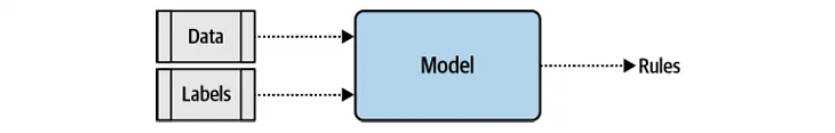

</center>

But, **the data is lumped in wholesale** $\rightarrow$ **no granularity involved** and **no effort to understand** the sequence in which that data occurs.

$\Rightarrow$ Means the words **`“blue”`** and **`“sky”`** have **no different meaning in sentences** such as:
- **Today I am blue, because the sky is gray**
- **Today I am happy, and there’s a beautiful blue sky**

$\Rightarrow$ **The limitations of the models like Sarcasm heading detector**

$\Rightarrow$ **Solution**: Recurrence

### **The nature of recurrence and how the basic RNN can work**

**Consider the Fibonacci sequence of numbers**

<center>

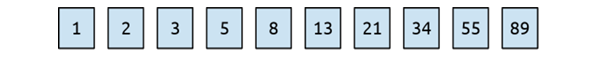

</center>

**Idea**: Every number is the sum of the two numbers preceding it and a computational graph is

<center>

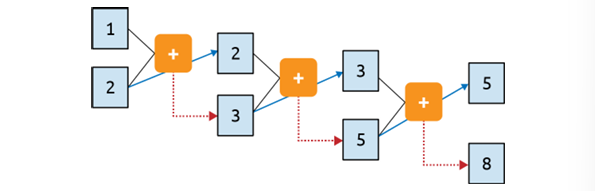

</center>

$\Rightarrow$ This process **continues indefinitely**, with every operation depending on those before it and some of the essence of the 1 is **`preserved` throughout the sequence**, though its **impact on the overall value** is **`diminished`**.

$\Rightarrow$ Analogous to how a recurrent neuron is architected

<center>

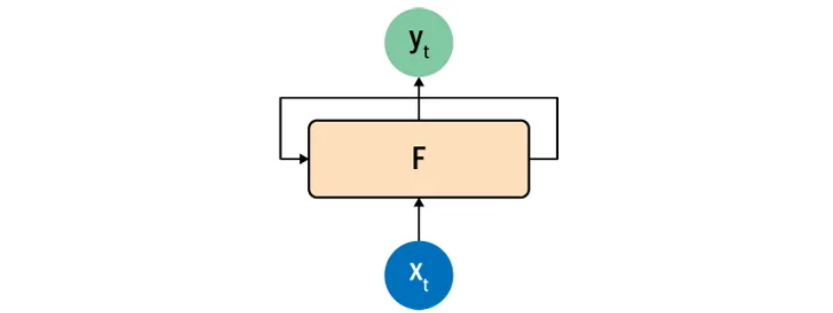

<caption>The typical representation of a recurrent neuron</caption>

</center>

The value `x` is fed into the function `F` **at a time step** $\rightarrow$ labelled $`x_t`$. This **produces** an **output** `y` **at that time step** $\rightarrow$ labelled $y_t$. 

It **ALSO produces a value** that is **fed forward to the next step**, which is indicated by **the arrow from `F` to itself**.

**A little clearer** if look at how recurrent neurons work beside each other across time steps

<center>

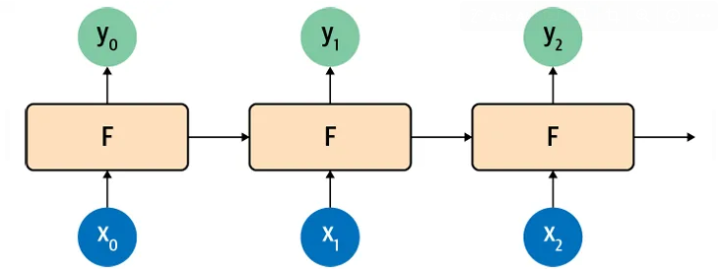

</center>

1. $x_0$ is **operated on** to **get** $y_0$ and **a value that's passed forward**. 
2. The next step gets **that value** and $x_1$ and **produces** $y_1$ and **a value that’s passed forward**. 
3. The next one gets **that value** and $x_2$ and **produces** $y_2$ and **a pass-forward value**, and so on. 

$\Rightarrow$ **Similar to the Fibonacci sequence works.**

### **Extending Recurrence for Language**

**RRNN** can help **maintain context across a sequence**. But there’s a **nuance** when it comes to language that can be **missed** when using a simple RNN above.

As **the Fibonacci sequence**, **the amount of context** that’s **carried over will diminish over time** $\Rightarrow$ **The effect of the output of the neuron at step 1 is huge at step 2, smaller at step 3, smaller still at step 4, and so on**.

$\rightarrow$ S: ***Today has a beautiful blue \<something\>*** $\rightarrow$ the word **blue** will have **a strong impact on the next word** $\rightarrow$ guess that it’s likely to be **sky**.


**`Question`**: *But what about context that comes from further back in a sentence?* 

$\rightarrow$ S: ***I lived in Ireland, so in high school I had to learn how to speak and write \<something\>***  $\rightarrow$ **\<something\> is Gaelic**, but the word gives us that context is **Ireland**, which is **much further back** in the sentence. 

$\Rightarrow$ To recognize what **\<something\>** should be, a way for context to be **preserved across a longer distance** is needed. 

**SOLUTION**: *The short-term memory of an RNN needs to get longer, and in recognition of this, an enhancement to the architecture called long short-term memory (LSTM) was invented.*

### **Architecture**

**The LSTM architecture** enhances the basic RNN by **adding a `cell state`** that enables **`context`** to **be maintained not just from step to step but across the entire sequence of steps**. 

**Remember**: These are **neurons learning** in the way **neurons do**, ensures that **the important context will be learned over time**.

<center>

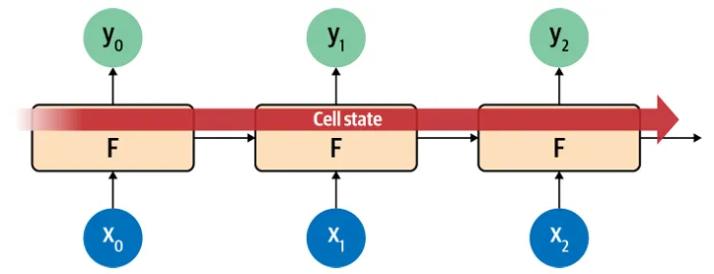

<caption>High-level view of LSTM architecture</caption>

</center>

An important part of an **LSTM** is that it can be **`bidirectional`**—**the time steps are iterated both forward and backward** $\rightarrow$ context can be learned in both directions.


<center>

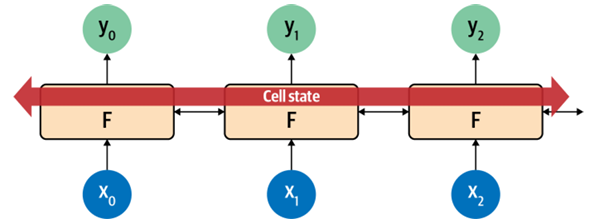
<caption>High-level view of LSTM bidirectional architecture</caption>

</center>

In this way, **evaluation in the direction from `0` to `number_of_steps` is done**, as **is evaluation from `number_of_steps` to `0`**. 

At each step, the **`y`** result is **an aggregation of the `forward` pass and the `backward` pass**.

<center>

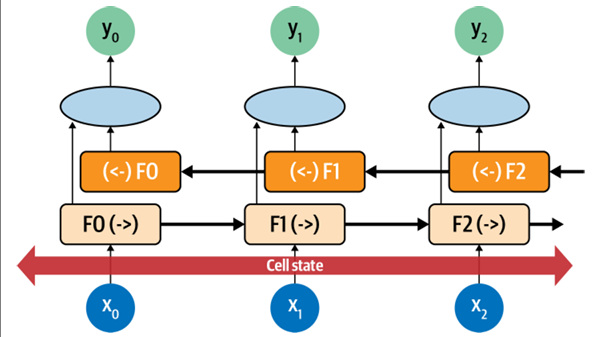

</center>

Consider each neuron at each time step to be **`F0`**, **`F1`**, **`F2`**, etc. 

The direction of the time step shows the calculation at F1 in the **forward** direction is **`F1(->)`**, and in the **reverse** direction it’s **`(<-)F1`**. **Theses values** are **aggregated** to give **the y value** for that time step. 

Additionally, the cell state is **bidirectional** $\rightarrow$ useful for **managing context in sentences**. 

$\rightarrow$ S: ***I lived in Ireland, so in high school I had to learn how to speak and write \<something\>*** - **\<something\> was qualified to be Gaelic** by **the context word Ireland** .

*But what if it were the other way around?* 

$\rightarrow$ S: ***I lived in \<this country\>, so in high school I had to learn how to speak and write Gaelic?*** $\Rightarrow$ By going backward through the sentence $\rightarrow$ can learn about what **\<this country\>** should be.

$\Rightarrow$ **Using bidirectional LSTMs can be very powerful for understanding sentiment in text**

### **Creating a Text Classifier with RNNs**

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the HTML tags
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import json

# Take the stopwords
import spacy
import string 

en = spacy.load("en_core_web_lg")
stopwords = en.Defaults.stop_words

In [3]:
datastore = []
table = str.maketrans('', '', string.punctuation)

with open ('./datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json') as jsonFile:
    for line in jsonFile:
        line = json.loads(line)
        datastore.append(line)      
        
sentences = []
labels = []  

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Preprocessing the data
for i, sentence in enumerate(sentences):
    # Remove if have HTML tags
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    
    sentence = sentence.lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    
    filter_sentence = ""
    words = sentence.split()
    
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filter_sentence = filter_sentence + word + " "
    
    sentences[i] = filter_sentence

C:\Users\nguye\AppData\Local\Temp\ipykernel_50740\192678232.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [4]:
train_size = 23000

train_set = sentences[:train_size]
test_set = sentences[train_size:]

train_label = labels[:train_size]
test_label = labels[train_size:]

In [5]:
# Convert the training set into numpy array
train_set = np.array(train_set)
train_label = np.array(train_label)

test_set = np.array(test_set)
test_label = np.array(test_label)


In [6]:
vocal_size = 20000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocal_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [7]:
word_index = tokenizer.word_index

word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'report': 5,
 'year': 6,
 'day': 7,
 'woman': 8,
 'u': 9,
 'area': 10,
 's': 11,
 'time': 12,
 'says': 13,
 'donald': 14,
 'like': 15,
 'old': 16,
 'life': 17,
 'people': 18,
 'trumps': 19,
 'house': 20,
 'white': 21,
 'obama': 22,
 'women': 23,
 '5': 24,
 'clinton': 25,
 'world': 26,
 'years': 27,
 'family': 28,
 'way': 29,
 'americans': 30,
 'black': 31,
 'study': 32,
 'american': 33,
 'school': 34,
 'gop': 35,
 'bill': 36,
 '3': 37,
 'finds': 38,
 'best': 39,
 'nation': 40,
 'know': 41,
 'cant': 42,
 'police': 43,
 'going': 44,
 '10': 45,
 'watch': 46,
 'good': 47,
 'death': 48,
 'state': 49,
 'home': 50,
 'president': 51,
 'video': 52,
 '2': 53,
 'big': 54,
 'things': 55,
 'love': 56,
 'parents': 57,
 'campaign': 58,
 'mom': 59,
 'right': 60,
 'health': 61,
 'getting': 62,
 'party': 63,
 'work': 64,
 'hillary': 65,
 'kids': 66,
 '000': 67,
 'self': 68,
 'gets': 69,
 'dead': 70,
 'little': 71,
 'high': 72,
 'need': 73,
 'doesnt': 74,


In [8]:
train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)


train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100)  

In [9]:
embedding_dim = 64

tf.keras.layers.Embedding(vocal_size, embedding_dim)

<Embedding name=embedding, built=False>

With the classifier for the Sarcasm dataset using embeddings $\rightarrow$ words were turned into vectors before being aggregated and then fed into dense layers for classification.

When using an RNN layer such as an LSTM $\rightarrow$ doesn’t do the aggregation and can feed the output of the embedding layer **directly** into the recurrent layer.

When it comes to the **dimensionality of the recurrent layer**, a rule of thumb  often see is that it’s the **same size as the embedding dimension** *[This isn’t necessary, but can be a good starting point]*. 

**Note**: The **embedding dimension** is often **the fourth root of the size of the vocabulary**, when using RNNs, ***that rule is ignored because it would make the size of the recurrent layer too small***.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [11]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [12]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5273 - val_loss: 0.6907
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.5218 - loss: 0.6901 - val_accuracy: 0.5275 - val_loss: 0.6876
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.5231 - loss: 0.6865 - val_accuracy: 0.5376 - val_loss: 0.6828
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.5485 - loss: 0.6802 - val_accuracy: 0.5987 - val_loss: 0.6741
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.6223 - loss: 0.6699 - val_accuracy: 0.6416 - val_loss: 0.6585
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.6537 - loss: 0.6510 - val_accuracy: 0.6426 - val_loss: 0.6399
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.6623 - loss: 0.6295 - val_accuracy: 0.6574 - val_loss: 0.6235
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.6792 - loss: 0.6083 - 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,047,509 (15.44 MB)

 Trainable params: 1,349,169 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,698,340 (10.29 MB)

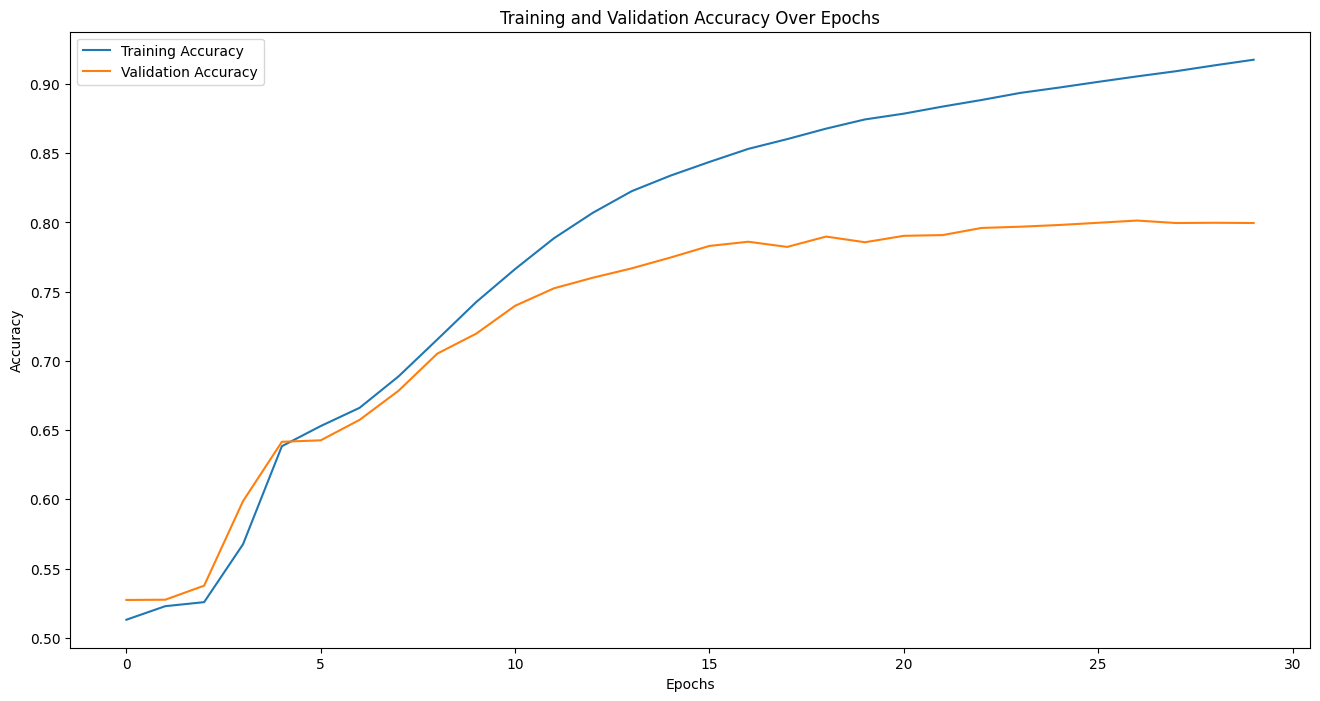

In [14]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

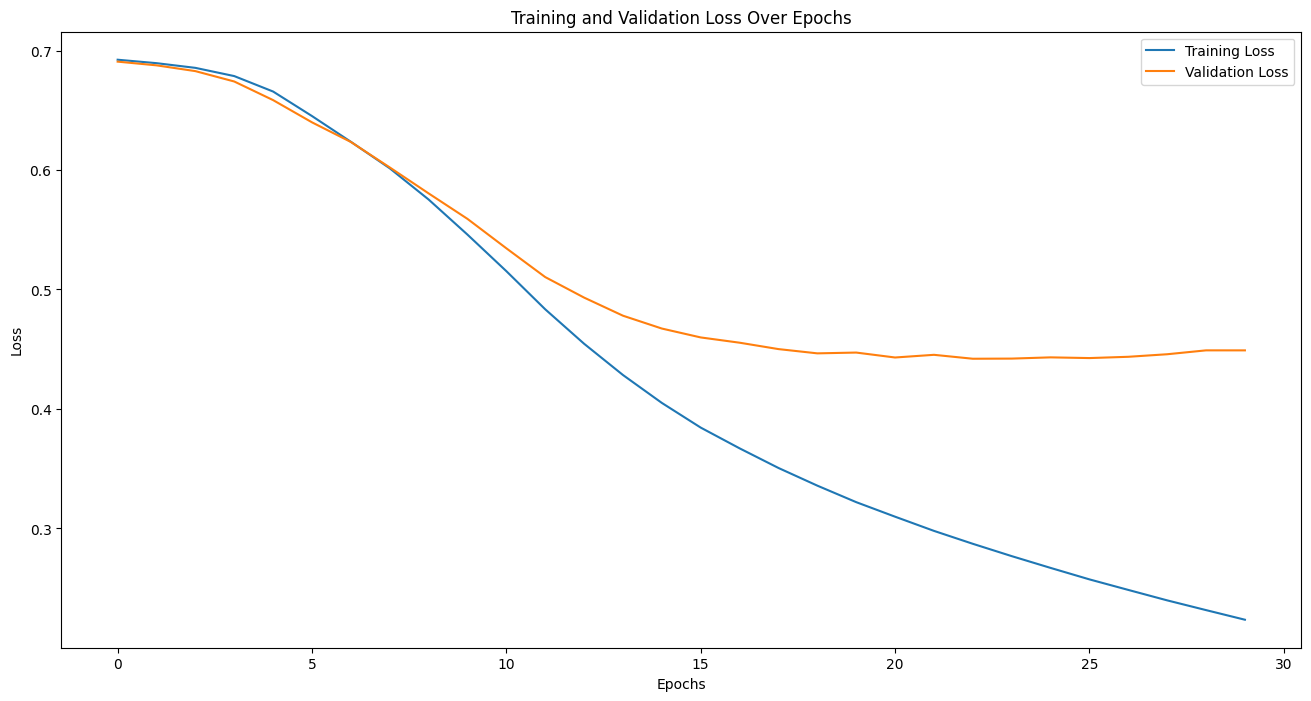

In [15]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Stacking LSTMs**

The LSTMs can be **stacked on top of each other** and **this approach is used in many `state-of-the-art` NLP models**.

Add them as extra layers just like a **Dense layer** but **all of the layers** prior to **the last one** need to set their **`return_sequences = True`**.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [17]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 100s 121ms/step - accuracy: 0.5204 - loss: 0.6926 - val_accuracy: 0.5280 - val_loss: 0.6899
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 109s 152ms/step - accuracy: 0.5302 - loss: 0.6883 - val_accuracy: 0.5594 - val_loss: 0.6841
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 100s 138ms/step - accuracy: 0.5709 - loss: 0.6821 - val_accuracy: 0.5998 - val_loss: 0.6731
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 96s 133ms/step - accuracy: 0.6193 - loss: 0.6669 - val_accuracy: 0.6232 - val_loss: 0.6524
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 133s 121ms/step - accuracy: 0.6401 - loss: 0.6419 - val_accuracy: 0.6588 - val_loss: 0.6189
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 90s 125ms/step - accuracy: 0.6982 - loss: 0.5852 - val_accuracy: 0.7411 - val_loss: 0.5167
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.8000 - loss: 0.4449 - val_accuracy: 0.7654 - val_loss: 0.4884
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 88s 123ms/step - accuracy: 0.8305 - los

**The final layer** can set **`return_sequences=True`** $\rightarrow$ in which case, **return sequences of values** to the dense layers for classification **instead of single ones**. 

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,343,957 (16.57 MB)

 Trainable params: 1,447,985 (5.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,895,972 (11.05 MB)

Adding the extra layer $\rightarrow$ **roughly 100,000 extra parameters** that need to be learned, **an increase of about 8%** 

$\Rightarrow$ **slow** the network down, but the cost is relatively low if there’s a reasonable benefit

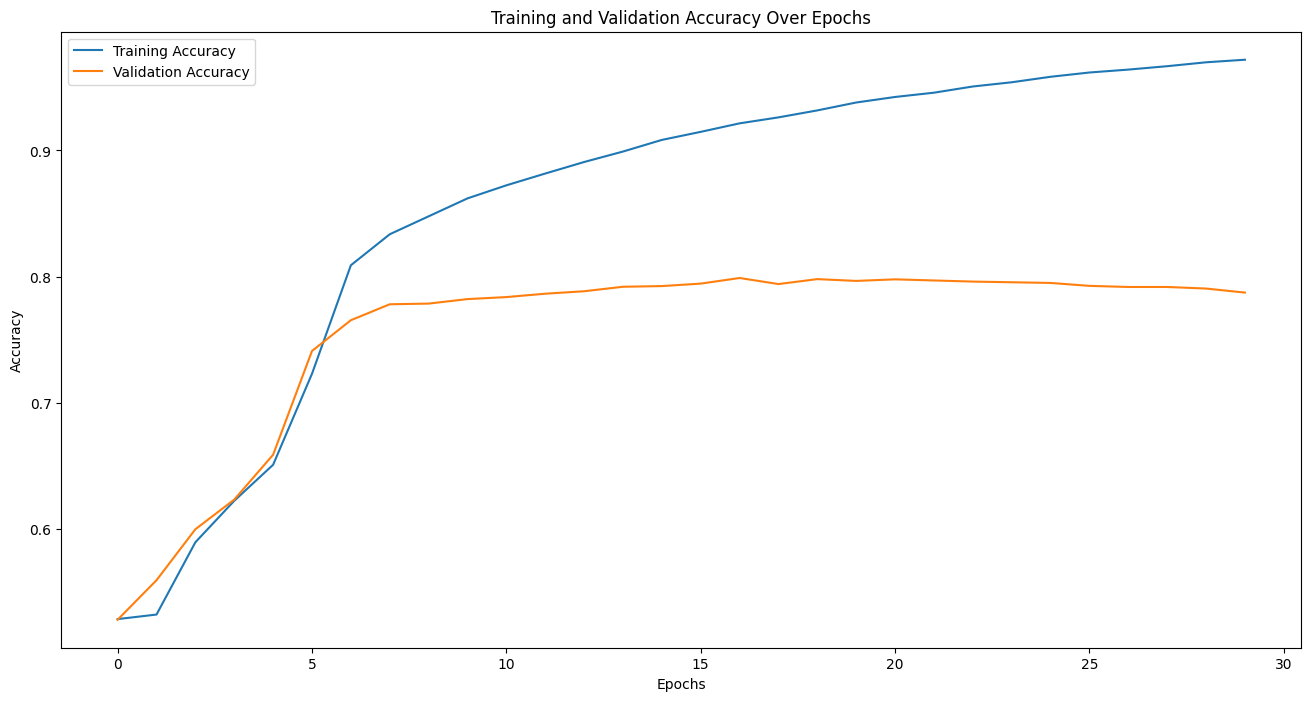

In [20]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

After training for 30 epochs, **the accuracy on the validation set is flat**, examining the loss tells a different story.

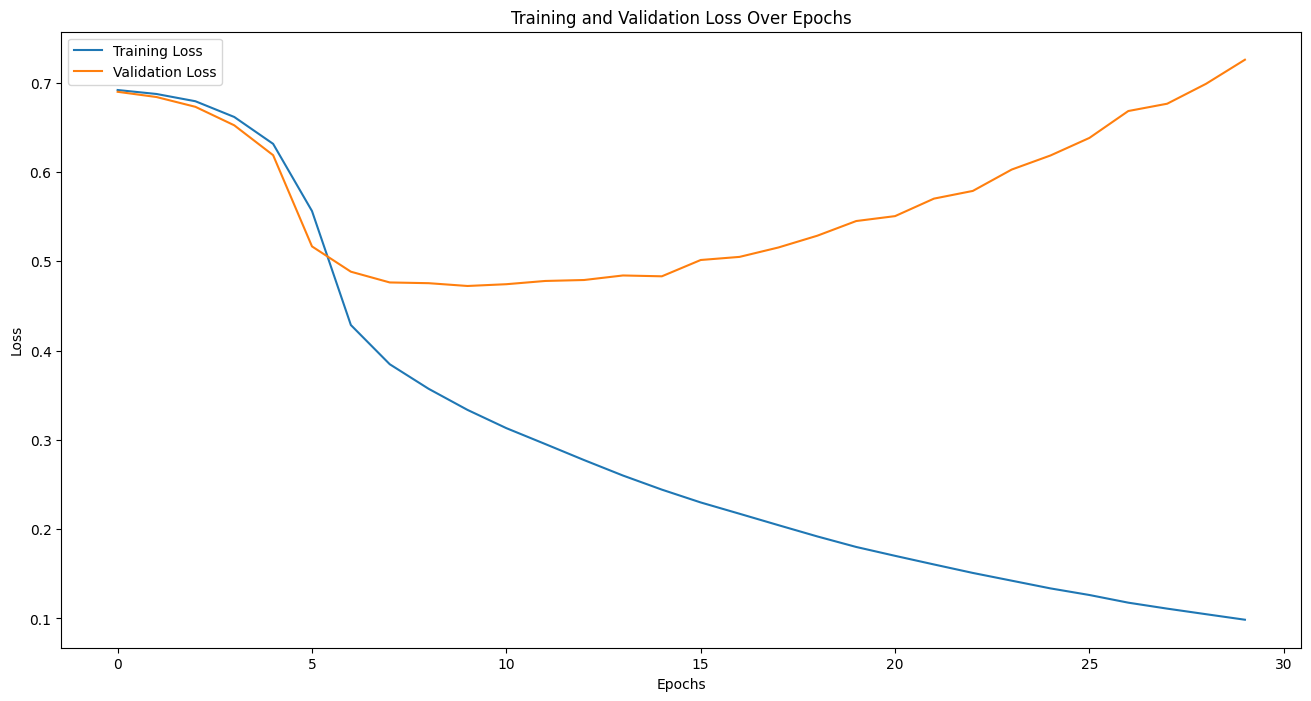

In [21]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

While **the accuracy** for both training and validation **looked good**, **the validation loss** quickly took off upwards $\rightarrow$ a clear sign of **overfitting**.

$\rightarrow$ **The training accuracy** climbing toward **100%** as **the loss** falls **smoothly**, while **the validation accuracy** is **relatively steady** and **the loss increases drastically** $\rightarrow$ getting overspecialized for training set. 

### **Optimizing stacked LSTMs**

**Reduce the learning rate**

Try to reduce the learning rate by **20%** from **0.00001** to **0.000008**

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [23]:
adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [24]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 103s 129ms/step - acc: 0.5266 - loss: 0.6921 - val_acc: 0.5273 - val_loss: 0.6904
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 100s 139ms/step - acc: 0.5228 - loss: 0.6903 - val_acc: 0.5273 - val_loss: 0.6880
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 94s 130ms/step - acc: 0.5206 - loss: 0.6880 - val_acc: 0.5458 - val_loss: 0.6827
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 100s 139ms/step - acc: 0.5697 - loss: 0.6807 - val_acc: 0.6154 - val_loss: 0.6701
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 101s 141ms/step - acc: 0.6271 - loss: 0.6632 - val_acc: 0.6241 - val_loss: 0.6456
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 127s 120ms/step - acc: 0.6499 - loss: 0.6312 - val_acc: 0.6866 - val_loss: 0.5953
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 137s 114ms/step - acc: 0.7362 - loss: 0.5472 - val_acc: 0.7546 - val_loss: 0.5005
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 85s 119ms/step - acc: 0.8075 - loss: 0.4354 - val_acc: 0.7694 - val_loss: 0.4857
Epoch 9/30
719/719 ━━━━━━━

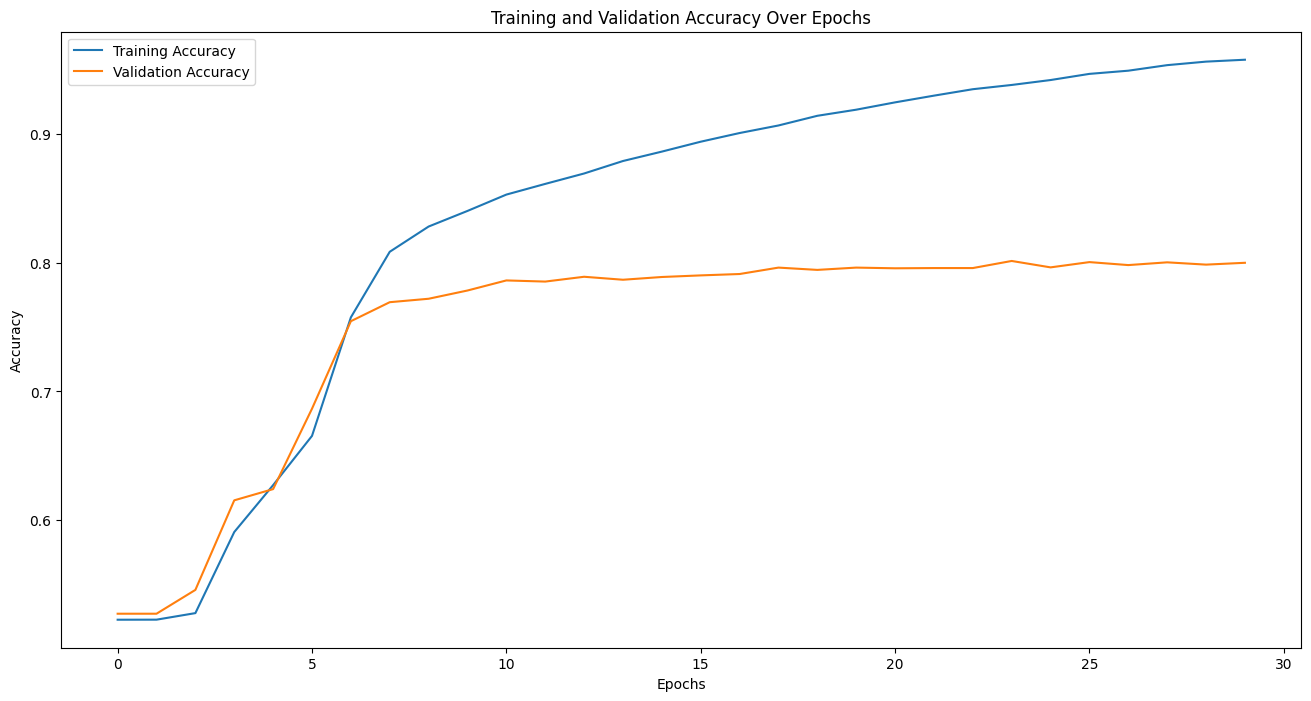

In [27]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['acc']))]  
acc = result['acc']
val_acc = result['val_acc']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

There **doesn’t seem to be much of a difference**, although the curves (particularly for the validation set) are a little smoother.

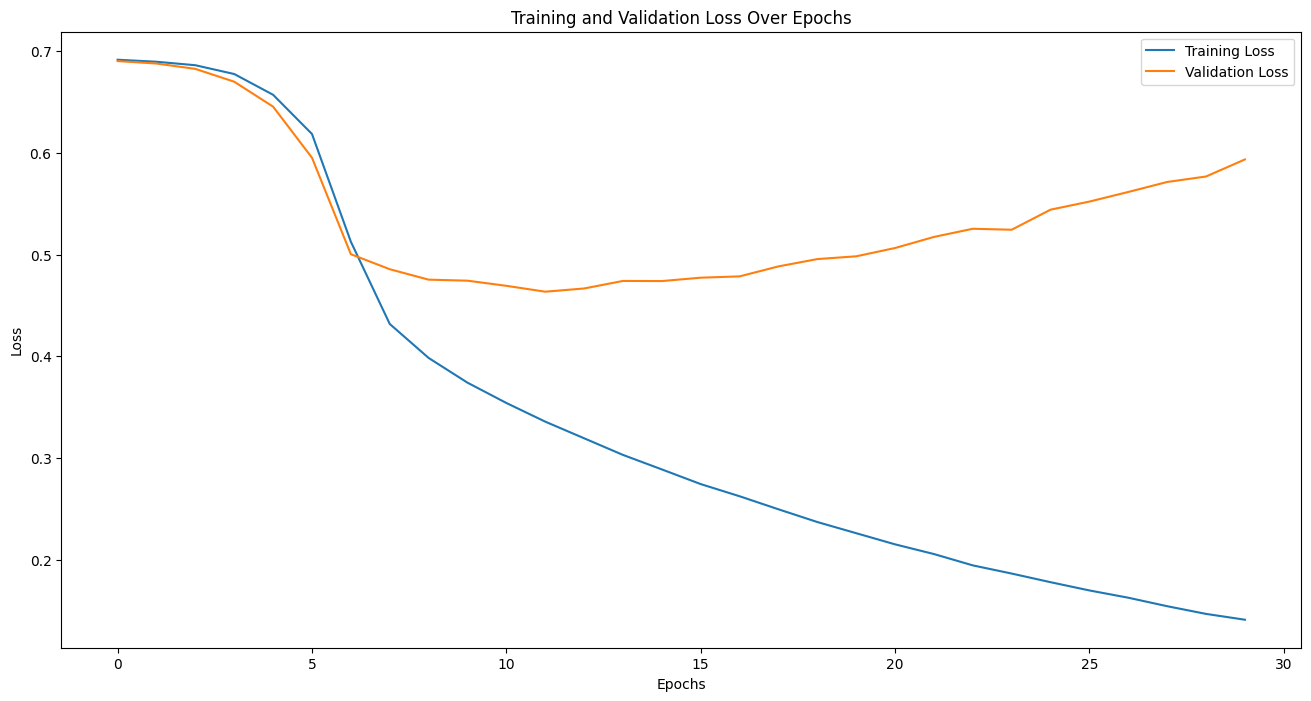

In [28]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

Despite **the shape of the curve** being **roughly similar**, **the rate of loss increase** is **clearly lower**: after 30 epochs it’s at around **0.6**, whereas with the higher learning rate it was close to **0.72+**. 

$\Rightarrow$ **Adjusting the learning rate** hyperparameter certainly seems **worth** investigation.

### **Using dropout**

**Using dropout in the LSTM layers**

It works exactly **the same as for dense layers**, where **random neurons are dropped** to **prevent a proximity bias from impacting the learning**.

**Dropout** can be implemented **using a parameter on the LSTM layer**.

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [30]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [31]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - acc: 0.5197 - loss: 0.6920 - val_acc: 0.5273 - val_loss: 0.6897
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 79s 110ms/step - acc: 0.5223 - loss: 0.6897 - val_acc: 0.5280 - val_loss: 0.6873
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 75s 104ms/step - acc: 0.5279 - loss: 0.6871 - val_acc: 0.5378 - val_loss: 0.6825
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 107s 149ms/step - acc: 0.5651 - loss: 0.6811 - val_acc: 0.6250 - val_loss: 0.6700
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 91s 126ms/step - acc: 0.6360 - loss: 0.6628 - val_acc: 0.6464 - val_loss: 0.6313
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 102s 141ms/step - acc: 0.6739 - loss: 0.6132 - val_acc: 0.7282 - val_loss: 0.5431
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 97s 134ms/step - acc: 0.7521 - loss: 0.5180 - val_acc: 0.7491 - val_loss: 0.5067
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 96s 134ms/step - acc: 0.7845 - loss: 0.4715 - val_acc: 0.7585 - val_loss: 0.4881
Epoch 9/30
719/719 ━━━━━━━━━━━

Using dropout doesn’t have much impact on the accuracy of the network, which is good! *[There’s always a worry that losing neurons will make the model perform worse, but that’s not the case]*

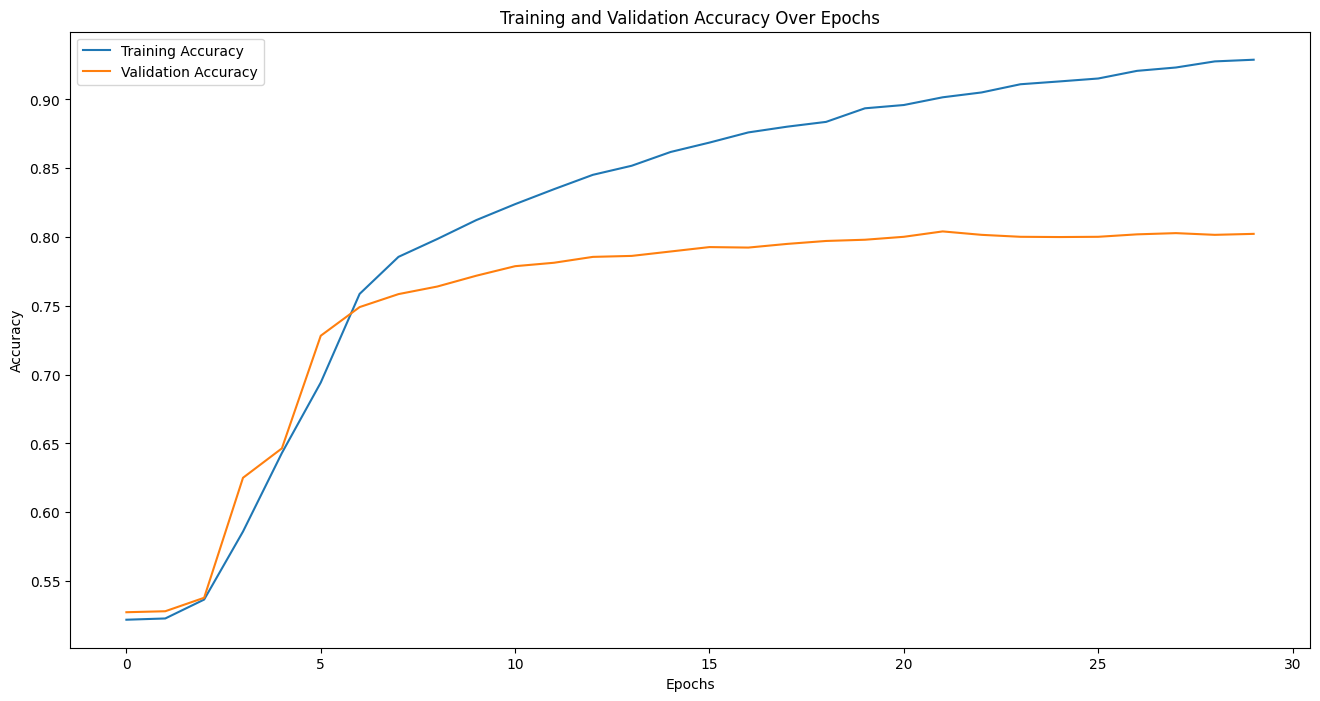

In [34]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['acc']))]  
acc = result['acc']
val_acc = result['val_acc']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

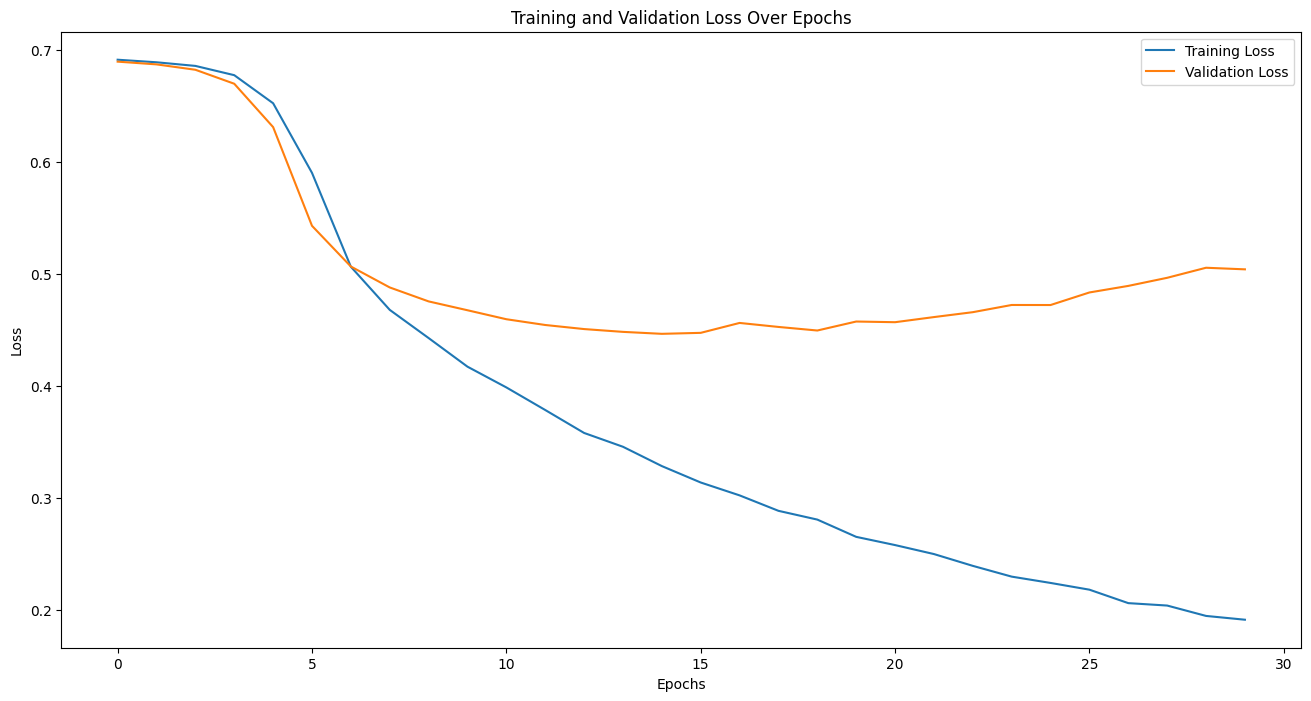

In [35]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

There’s also a positive impact on loss.

While the curves are **clearly diverging**, they are **closer than** they were previously, and the validation set **is flattening out at a loss of about 0.5**. That’s significantly better than the **0.72** seen previously.

$\Rightarrow$ Dropout is another handy technique $\rightarrow$ Can use to improve the performance of LSTM-based RNNs

### **Using Pretrained Embeddings with RNNs**

What if, instead of learning the embeddings from scratch, **use prelearned embeddings**, where researchers **have already done the hard work of turning words into vectors** and those vectors are proven?

**`GloVe (Global Vectors for Word Representation) model`** developed by *Jeffrey Pennington*, *Richard Socher* and *Christopher Manning* at *Stanford*.

In this case, the researchers have shared their pretrained word vectors for a variety of datasets:
- A **6-billion-token**, **400,000-word vocab set in 50, 100, 200, and 300 dimensions** with words taken from **Wikipedia** and **Gigaword**.
- A **42-billion-token**, **1.9-million-word vocab in 300 dimensions** from **a common crawl**.
- An **840-billion-token**, **2.2-million-word vocab in 300 dimensions** from **a common crawl**.
- A **27-billion-token**, 1**.2-million-word vocab in 25, 50, 100 and 200 dimensions** from **a Twitter crawl of 2 billion tweets**.


The vectors are already pretrained $\rightarrow$ reuse them in instead of learning from scratch. 

**1. Download the GloVe data**. 

$\rightarrow$ **Use the Twitter data with 27 billion tokens and a 1.2 million-word vocab**. The download is **an archive with 25, 50, 100, and 200 dimensions**.

**Each entry** in the file is **a word**, followed by **the dimensional coefficients** that **were learned for it**. 

$\Rightarrow$ Use these by **creating a dictionary** where **the key is the word** and **the values are the embeddings**.

In [36]:
glove_embeddings = dict()

f = open('./glove.twitter.27B/glove.twitter.27B.25d.txt', encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs

f.close()

**Look up** the set of **coefficients** for **any word** simply by **using it as the key**. 

So, for example, to see the embeddings for **`frog`**:

In [37]:
glove_embeddings['frog']

array([-1.2158  , -0.74924 ,  0.91941 ,  0.72985 , -0.12917 , -0.19555 ,
        1.2365  , -0.77196 ,  0.85161 ,  0.11922 ,  0.16816 ,  0.33334 ,
       -2.0845  , -0.53471 ,  0.013538,  0.18178 ,  1.2831  ,  0.089331,
        0.57264 ,  0.50694 ,  0.27134 ,  0.66504 ,  0.54097 , -0.58377 ,
        0.67097 ], dtype=float32)

Use the tokenizer to get the word index for the corpus as before - but now **creating a new matrix** named **embedding matrix**.

This will use the GloVe set embeddings (taken from **glove_embeddings**) as its values.

The **first row** in the embedding matrix should be **the coefficients from GloVe for `<OOV>`**, the **next row** will be the coefficients for **`new`**, and so on.

In [43]:
tokenizer.word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'report': 5,
 'year': 6,
 'day': 7,
 'woman': 8,
 'u': 9,
 'area': 10,
 's': 11,
 'time': 12,
 'says': 13,
 'donald': 14,
 'like': 15,
 'old': 16,
 'life': 17,
 'people': 18,
 'trumps': 19,
 'house': 20,
 'white': 21,
 'obama': 22,
 'women': 23,
 '5': 24,
 'clinton': 25,
 'world': 26,
 'years': 27,
 'family': 28,
 'way': 29,
 'americans': 30,
 'black': 31,
 'study': 32,
 'american': 33,
 'school': 34,
 'gop': 35,
 'bill': 36,
 '3': 37,
 'finds': 38,
 'best': 39,
 'nation': 40,
 'know': 41,
 'cant': 42,
 'police': 43,
 'going': 44,
 '10': 45,
 'watch': 46,
 'good': 47,
 'death': 48,
 'state': 49,
 'home': 50,
 'president': 51,
 'video': 52,
 '2': 53,
 'big': 54,
 'things': 55,
 'love': 56,
 'parents': 57,
 'campaign': 58,
 'mom': 59,
 'right': 60,
 'health': 61,
 'getting': 62,
 'party': 63,
 'work': 64,
 'hillary': 65,
 'kids': 66,
 '000': 67,
 'self': 68,
 'gets': 69,
 'dead': 70,
 'little': 71,
 'high': 72,
 'need': 73,
 'doesnt': 74,


In [44]:
len(tokenizer.word_index)


27002

In [45]:
embedding_dim = 25
vocal_size = 13200

embedding_matrix = np.zeros((vocal_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if index > vocal_size - 1:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.177     ,  0.43200001,  0.21391   , ..., -0.099247  ,
        -0.58947998, -0.42467999],
       ...,
       [ 0.82855999,  0.58879   ,  0.035848  , ..., -0.95020998,
         0.50932997, -0.58148998],
       [-0.26791999,  0.80988997, -0.35429999, ...,  0.54554999,
        -0.54324001, -0.81190002],
       [ 0.022008  ,  0.99254   , -1.69529998, ..., -0.97049999,
         0.44553   ,  0.1145    ]])

**1. Creating a matrix** with **the dimensions of the desired vocab size and the embedding dimension**. 

**2. For every item in the tokenizer's word index**, look up **the coefficients** from **GloVe** in **`glove_embeddings`** and add those values to the matrix.

**3. Amend the embedding layer to use the pretrained embeddings** by setting the **`weights`** parameter, and specify that not want the layer to be trained by setting **`trainable=False`**.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

**Consider the vocab size** - One of the optimizations is to **avoid overfitting** was intended to **prevent the embeddings becoming overburdened with learning low-frequency words** $\Rightarrow$ **avoided overfitting by using a smaller vocabulary of frequently used words**. 

In this case, as **the word embeddings** have **already been learned** with GloVe, expand the vocabulary—but by how much?

----

**Question**: *The first thing to explore is how many of the words in the corpus are actually in the GloVe set?*

It has 1.2 million words, but there’s no guarantee it has all of words.

**Explore how large the vocab should be**

**1. Sort the data out** $\rightarrow$ Creating a list of `xs` and `ys`, where **X is the word index**, and **Y=1 if the word is in the embeddings and 0 if it isn’t**. 

Additionally, **create a cumulative set**, where **count the quotient of words at every time step**. 

For example, the word **`OOV`** at index 0 **isn’t in GloVe** $\rightarrow$ **cumulative Y would be 0**. The word **`new`** at the next index, **is in GloVe** $\rightarrow$ **cumulative Y would be 0.5** (i.e., half of the words seen so far are in GloVe) $\rightarrow$ continue to count that way for the entire dataset:

In [46]:
xs = []
ys = []
cumulative_x = []
cumulative_y = []

total_y = 0

for word, index in tokenizer.word_index.items():
    xs.append(index)
    cumulative_x.append(index)
    
    if glove_embeddings.get(word) is not None:
        total_y = total_y + 1
        ys.append(1)
    else:
        ys.append(0)
    
    cumulative_y.append(total_y / index)

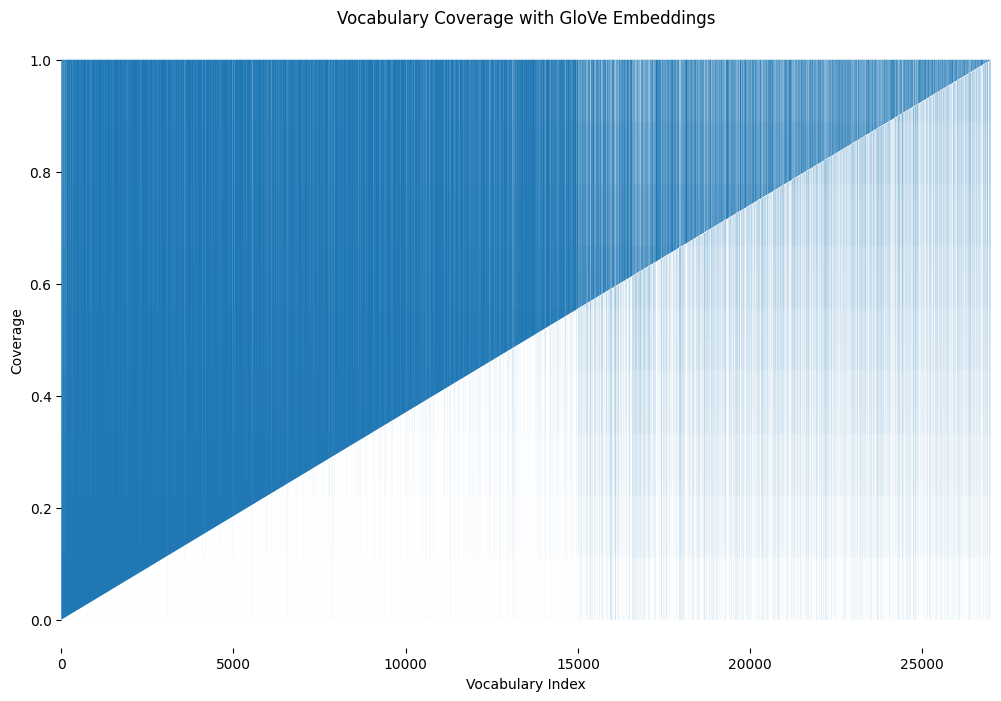

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Vocabulary Coverage with GloVe Embeddings')
plt.xlabel('Vocabulary Index')
plt.ylabel('Coverage')
plt.margins(x=0, y=None, tight=True)
# plt.axis([13000, 14000, 0, 1])
plt.fill(ys)

**The density changes** somewhere **between 10,000 and 15,000**. This gives an eyeball check that somewhere around token 13,000 the frequency of words that are not in the GloVe embeddings starts to outpace those that are.

Then plot the `cumulative_x` against the `cumulative_y` to get a better sense of this.

(0.0, 25000.0, 0.915, 0.985)

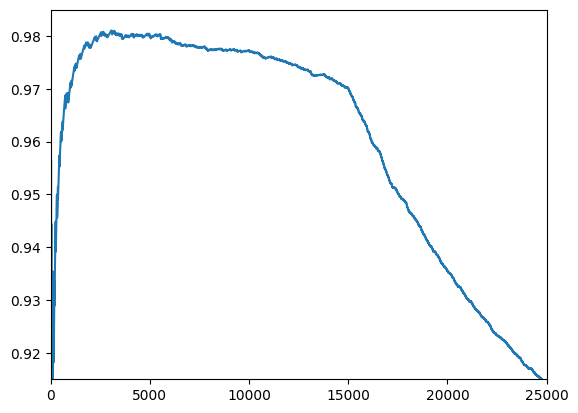

In [51]:
plt.plot(cumulative_x, cumulative_y)
plt.axis([0, 25000, .915, .985])

Tweak the parameters in **plt.axis** to **zoom in to find the inflection point** where **words not present in GloVe begin to outpace those that are in GloVe** 

$\Rightarrow$ **A good starting point** to set the size of the vocabulary.

Using this method $\rightarrow$ chose to **use a vocab size of 13,200** (instead of the 2,000) and this model architecture, where `the embedding_dim is 25` because of the GloVe set used:

In [52]:
datastore = []
table = str.maketrans('', '', string.punctuation)

with open ('./datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json') as jsonFile:
    for line in jsonFile:
        line = json.loads(line)
        datastore.append(line)      
        
sentences = []
labels = []  

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Preprocessing the data
for i, sentence in enumerate(sentences):
    # Remove if have HTML tags
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    
    sentence = sentence.lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    
    filter_sentence = ""
    words = sentence.split()
    
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filter_sentence = filter_sentence + word + " "
    
    sentences[i] = filter_sentence

C:\Users\nguye\AppData\Local\Temp\ipykernel_50740\192678232.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [53]:
train_size = 23000

train_set = sentences[:train_size]
test_set = sentences[train_size:]

train_label = labels[:train_size]
test_label = labels[train_size:]

In [54]:
# Convert the training set into numpy array
train_set = np.array(train_set)
train_label = np.array(train_label)

test_set = np.array(test_set)
test_label = np.array(test_label)


In [55]:
vocab_size = 13200
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)


train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100)  


model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
        return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [56]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.5156 - loss: 0.6959 - val_accuracy: 0.5218 - val_loss: 0.6913
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.5271 - loss: 0.6906 - val_accuracy: 0.5700 - val_loss: 0.6869
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 70s 98ms/step - accuracy: 0.5781 - loss: 0.6861 - val_accuracy: 0.6092 - val_loss: 0.6804
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 73s 101ms/step - accuracy: 0.6119 - loss: 0.6783 - val_accuracy: 0.6389 - val_loss: 0.6679
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 62s 87ms/step - accuracy: 0.6490 - loss: 0.6643 - val_accuracy: 0.6517 - val_loss: 0.6514
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 65s 90ms/step - accuracy: 0.6559 - loss: 0.6462 - val_accuracy: 0.6622 - val_loss: 0.6344
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 68s 94ms/step - accuracy: 0.6681 - loss: 0.6292 - val_accuracy: 0.6683 - val_loss: 0.6212
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.6677 - loss: 0.6204 

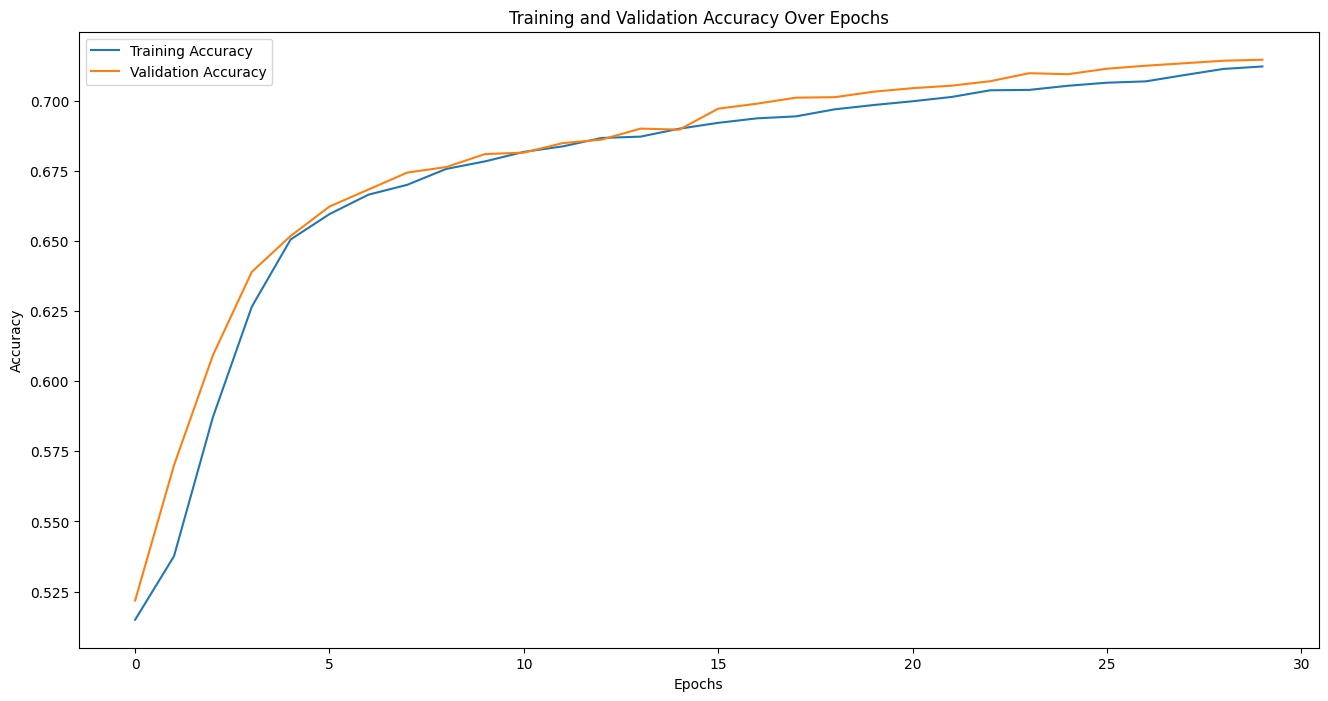

In [57]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

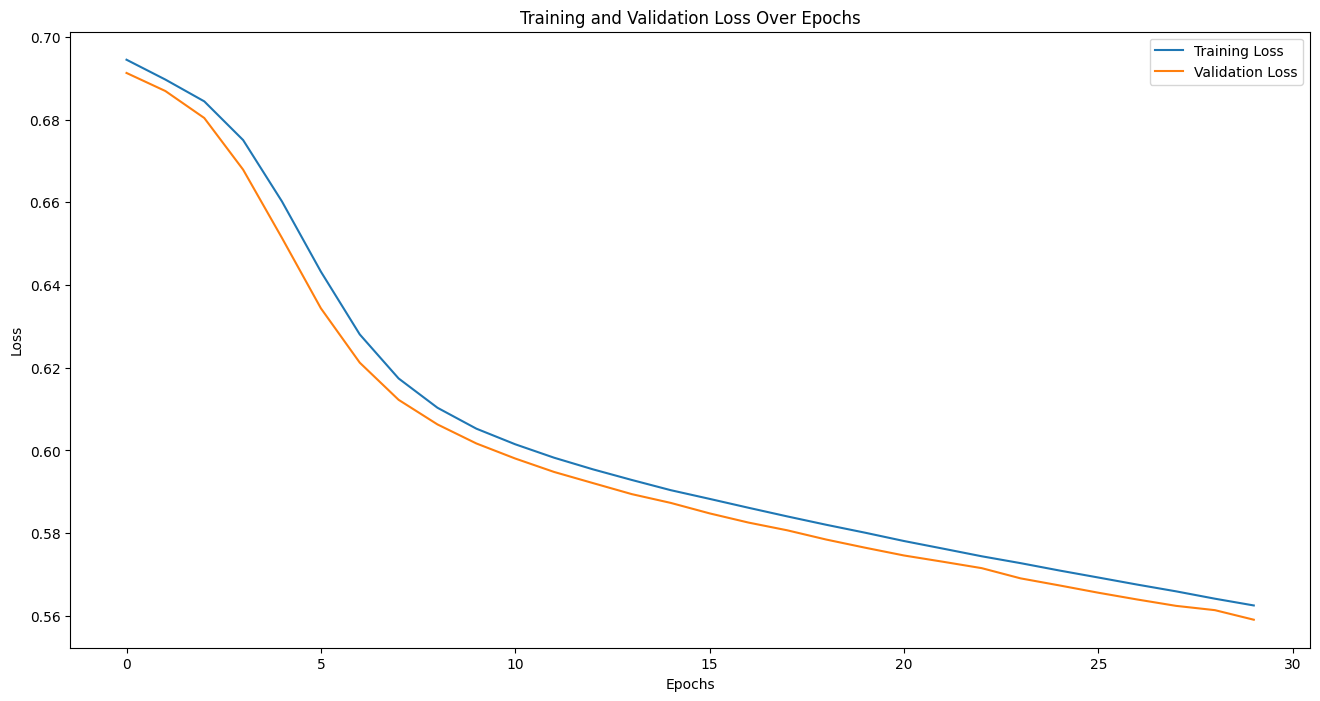

In [58]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

**The validation loss no longer diverges** $\rightarrow$ Although the accuracy is only **~73%** 

$\Rightarrow$ Can be confident that the model is accurate to that degree.

**Training the model for longer shows very similar results** $\rightarrow$ while **overfitting begins to occur right around epoch 80, the model is still very stable**.

The accuracy metrics show a well-trained model.

<center>

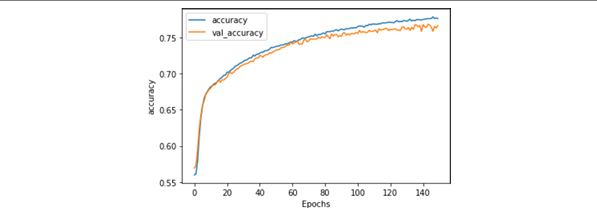

<caption>Accuracy on stacked LSTM with GloVe over 150 epochs</caption>

</center>

The loss metrics show **the beginning of divergence at around epoch 80**, but the model still fits well.

<center>

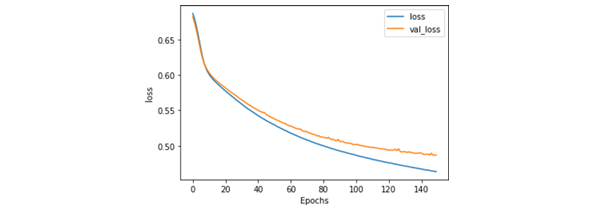

<caption> Loss on stacked LSTM with GloVe over 150 epochs </caption>

</center>

$\Rightarrow$ This model is a good candidate for early stopping, where just train it **for 75–80 epochs to get the optimal results**.

Test the model with headlines from ***The Onion***, source of the sarcastic headlines in the Sarcasm dataset, against other sentences.

In [59]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in high school they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]

test_sentences = tokenizer.texts_to_sequences(test_sentences)
train_sequence_padded = pad_sequences(test_sentences, padding='post', maxlen=100)  

The values **close to 50% (0.5)** are considered **`neutral`**, **close to 0** **`nonsarcastic`**, and **close to 1** **`sarcastic`**

In [60]:
model.predict(train_sequence_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.56889486],
       [0.26792333],
       [0.85406333],
       [0.80698884]], dtype=float32)

The third and fourth sentences showed **80%+** likelihood of sarcasm. The statement about the weather was strongly nonsarcastic (**26%+**), and the sentence about going to high school in Ireland was deemed to be potentially sarcastic, but not with high confidence (**56%+**).